In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/ayemaq/Desktop/Mod4_prj/dataset/hour.csv')

In [4]:
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


I want to make sure the dataset is clean first

In [6]:
# fix datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [7]:
df.duplicated().sum()

0

In [8]:
#check by duplicated rows 
df[df.duplicated()]  # rows that are completely identical

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [9]:
df['dteday'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Name: dteday, Length: 17379, dtype: bool

### Understand the normalized columns: 
- temp
    - 0 -> -8 °C
    - 1 -> +39 °C

- atemp
    - 0 -> -16 °C
    - 1 -> +50 °C

- hum
    - 0 -> 0% humidity
    - 1 -> 100% humidity

- windspeed
    - 0 -> 0 (no wind)
    - 1 -> 67 (max observed wind speed, units scaled)

#### context
- I won’t usually see 0 or 1 unless the data recorded the absolute min or max weather condition for that whole dataset period.
- decimals are the normal state, they just tell you where the real value falls between min and max.
- I'll use quantilies for cutoffs, makes more sense logically: 25, 50, 75

### Overall shape of the dataset

In [10]:
df.shape

(17379, 17)

In [11]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Statistical Summary

In [12]:
df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [13]:
# numeric-only summary
df.describe().T


,count,mean,min,25%,50%,75%,max,std
instant,17379.0,8690.0,1.0,4345.5,8690.0,13034.5,17379.0,5017.0295
dteday,17379,2012-01-02 04:08:34.552045568,2011-01-01 00:00:00,2011-07-04 00:00:00,2012-01-02 00:00:00,2012-07-02 00:00:00,2012-12-31 00:00:00,NaN
season,17379.0,2.50164,1.0,2.0,3.0,3.0,4.0,1.106918
yr,17379.0,0.502561,0.0,0.0,1.0,1.0,1.0,0.500008
mnth,17379.0,6.537775,1.0,4.0,7.0,10.0,12.0,3.438776
hr,17379.0,11.546752,0.0,6.0,12.0,18.0,23.0,6.914405
holiday,17379.0,0.02877,0.0,0.0,0.0,0.0,1.0,0.167165
weekday,17379.0,3.003683,0.0,1.0,3.0,5.0,6.0,2.005771
workingday,17379.0,0.682721,0.0,0.0,1.0,1.0,1.0,0.465431
weathersit,17379.0,1.425283,1.0,1.0,1.0,2.0,4.0,0.639357


In [14]:
df['casual'].describe()

count    17379.000000
mean        35.676218
std         49.305030
min          0.000000
25%          4.000000
50%         17.000000
75%         48.000000
max        367.000000
Name: casual, dtype: float64

25% (Q1) = 4 -> in 25% of hours, there were 4 or fewer casual riders.

50% (Median) = 17 -> in half of all hours, casual riders were ≤ 17.

75% (Q3) = 48 -> in 75% of hours, casual riders were ≤ 48.

Max = 367  -> the busiest single hour for casual riders had 367 casual trips.

In [15]:
df['registered'].describe()

count    17379.000000
mean       153.786869
std        151.357286
min          0.000000
25%         34.000000
50%        115.000000
75%        220.000000
max        886.000000
Name: registered, dtype: float64

Note: There are clearly more registered riders than casual

In [16]:
df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

Note: .agg works across columns 

In [17]:
df.keys()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [18]:
# double check for consistency in normalization
df[['temp', 'atemp', 'hum', 'windspeed']].agg(['min', 'max'])


,temp,atemp,hum,windspeed
min,0.02,0.0,0.0,0.0000
max,1.00,1.0,1.0,0.8507


In [19]:
# Let's check if theres any correlation between weather and riders outcomes
df[['cnt','temp', 'atemp', 'hum', 'windspeed']].corr()

,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.404772,0.400929,-0.322911,0.093234
temp,0.404772,1.000000,0.987672,-0.069881,-0.023125
atemp,0.400929,0.987672,1.000000,-0.051918,-0.062336
hum,-0.322911,-0.069881,-0.051918,1.000000,-0.290105
windspeed,0.093234,-0.023125,-0.062336,-0.290105,1.000000


Breaking down the correlation matrix

cnt vs temp (0.40) -> positive correlation -> as temp rises, rides go up.

cnt vs atemp (0.40) -> basically the same as temp (since temp & atemp are ~0.99 correlated).

cnt vs hum (-0.32) -> negative correlation -> higher humidity = fewer rides.

cnt vs windspeed (0.09) -> very weak positive correlation -> windspeed doesn’t matter much.

#### what this means for stakeholders

PM/Marketing -> weather is a demand driver: more riders in warmer temps, fewer when humid.

Ops -> can plan better staffing for warm days (expect more demand).

Policy/Ethics (note to self): weather is a confounding factor because it naturally drives ridership, making it harder to tell if a product change (or promo) was the real reason demand shifted(e.g., you run a a/b test on a featured u launched in sept, you notice ridership went up in the afternoon, but you have to note that sept is a warm month, hence the importance  of correlation between weather and temp... warmer weathers maybe correlated to demand, so some of the increase in ridership may have to do with the weather not your feature)  
- a confounder is a variable that influences both:
    - the outcome you care about (bike demand, cnt)
    - and something else you’re testing (like a promo, a feature change, or day type)
- if you don’t account for it, you might think the change in demand was caused by your treatment, when in fact it was just due to weather

In [20]:
df[['cnt', 'casual', 'registered']].skew()

cnt           1.277412
casual        2.499237
registered    1.557904
dtype: float64

#### Break skewness down
This is a positive skew(strong positive for casual riders esp), meaning the right tail is long... the hour of day ther are some cases where people ride bikes in higher hours than others but the cluster seems to be on the left which is where the peak is 

#### implications

Median < Mean = means are inflated by those busy peak hours.

- Stakeholders should understand:
    - most of the time ridership is modest,
    - sometimes it spikes high (commutes, good weather, events)

## Next step in EDA: groupbys for patterns
- this is where you move from “overall distribution” to “patterns by context.”
- I’d start with rides by hour of day since it directly connects to:

PM -> when demand is strong/fragile

Ops -> staffing & rebalancing windows

Marketing -> promo timing

In [21]:
avg_hourly = df.groupby('hr')['cnt'].mean()

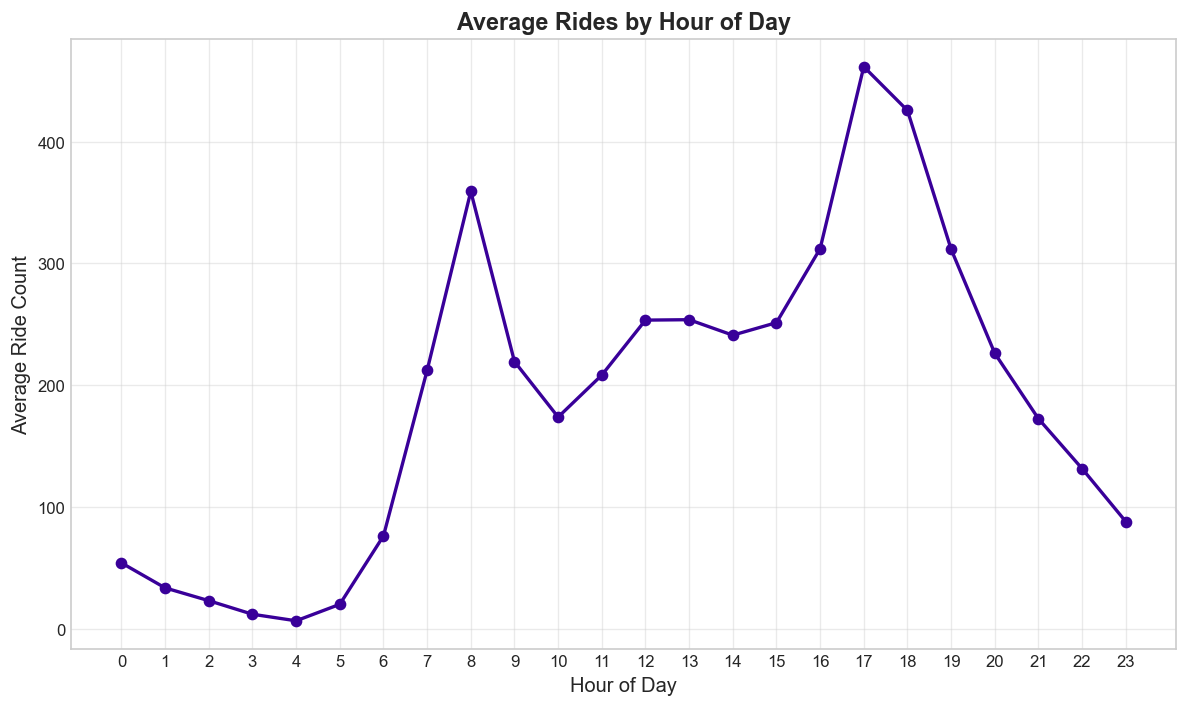

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

plt.figure(figsize=(10,6), dpi=120)
avg_hourly.plot(kind='line', marker='o', linewidth=2,color="#390099", ax=plt.gca() )

plt.title('Average Rides by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Ride Count', fontsize=12)
plt.xticks(range(0,24))
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()


0 = 12:00 AM (midnight)

1 = 1:00 AM

2 = 2:00 AM

3 = 3:00 AM

4 = 4:00 AM

5 = 5:00 AM

6 = 6:00 AM

7 = 7:00 AM

8 = 8:00 AM

9 = 9:00 AM

10 = 10:00 AM

11 = 11:00 AM

12 = 12:00 PM (noon)

13 = 1:00 PM

14 = 2:00 PM

15 = 3:00 PM

16 = 4:00 PM

17 = 5:00 PM

18 = 6:00 PM

19 = 7:00 PM

20 = 8:00 PM

21 = 9:00 PM

22 = 10:00 PM

23 = 11:00 PM

We can see that there's spikes in the morning(8 am) and evening(5 pm)

Some things to look at is maybe at those peaks whats teh weather, temp humidity like and we should also we look at hours thst dont do as well, and see if its due ot wokr day, or what exatly, through visuals for now since we will do staitsical analysis later 

some other visuals to look at if there are moer causl or registered during those peaks or where do both cateogries ride more often and less often its good to see the positive and neigative 

so the path forward is:

Break down peaks → are they driven by workingday? by registered vs casual?

Weather overlays → does temp/humidity change the shape of peaks?

Category splits → plot casual vs registered across hours.

In [23]:
# hour of day × workingday... see if weekday commute pattern is different from weekends/holidays.
avg_hourly_workday = df.groupby(['hr','workingday'])['cnt'].mean().unstack()


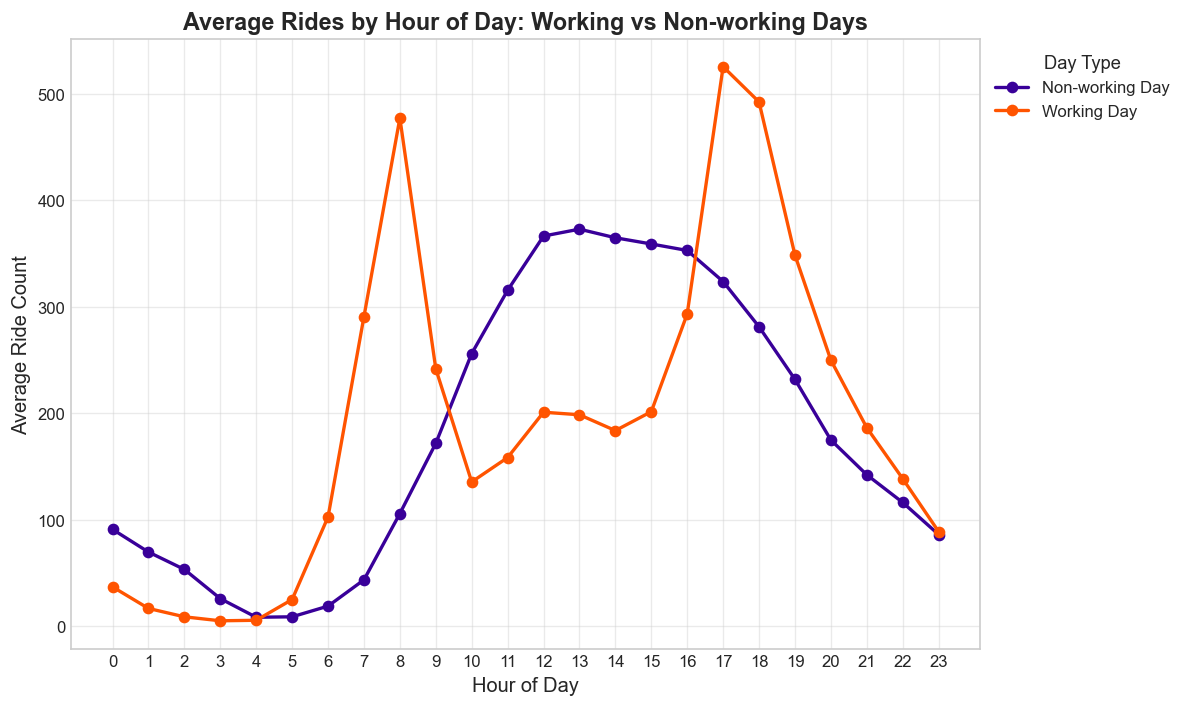

In [43]:
avg_hourly_workday = avg_hourly_workday.rename(columns={0: 'Non-working Day', 1: 'Working Day'})
# Plot
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(10,6), dpi=120)
avg_hourly_workday.plot(kind='line', marker='o', linewidth=2, ax=plt.gca(), color=["#390099", "#ff5400"])

plt.title('Average Rides by Hour of Day: Working vs Non-working Days', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Ride Count', fontsize=12)
plt.xticks(range(0,24))
plt.legend(title="Day Type", fontsize=10, title_fontsize=11, loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()


#### what the plot is showing

- Orange (1 = workingday): sharp commuter peaks at 8 AM and 5–6 PM, with higher spikes than weekends.
- Blue (0 = non-working day): flatter curve, but sustained higher ridership across midday and afternoon (10 AM–4 PM)

In [25]:
# instead of just cnt, calculate the average of both casual and registered by hour:
avg_cas_reg = df.groupby('hr')[['casual', 'registered']].mean()

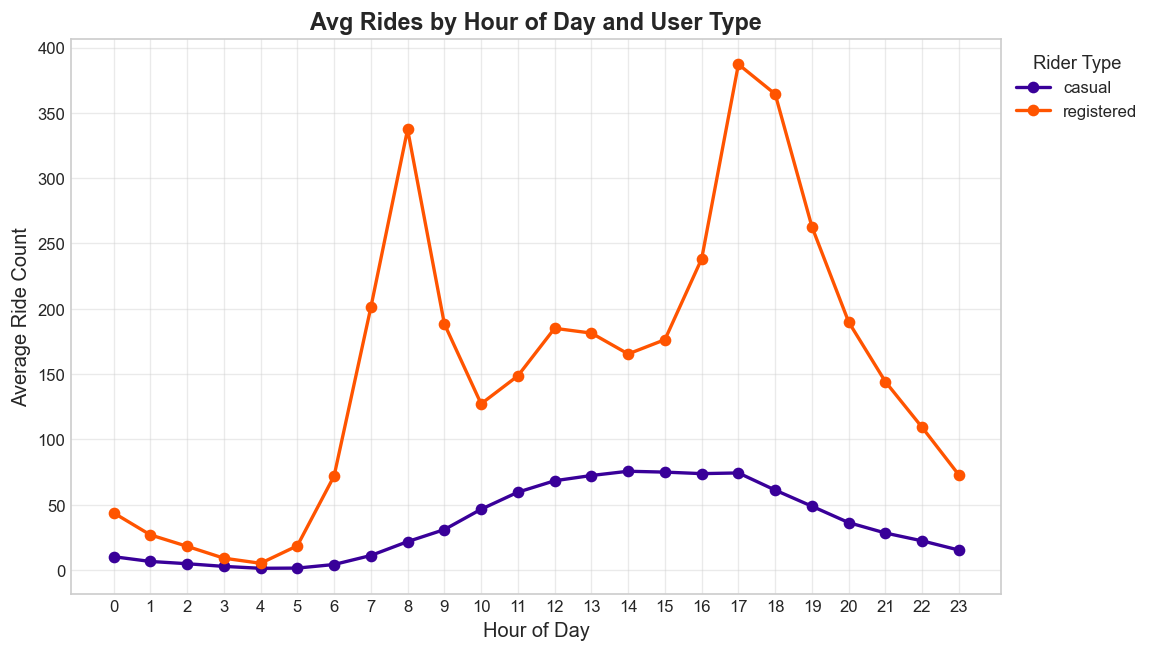

In [50]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(10,6), dpi=120)
avg_cas_reg.plot(kind='line', marker='o', linewidth=2, ax=plt.gca(), color=["#390099", "#ff5400"])
plt.title('Avg Rides by Hour of Day and User Type', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day',fontsize=12)
plt.ylabel('Average Ride Count', fontsize=12)
plt.xticks(range(0,24))
plt.legend(title="Rider Type", fontsize=10, title_fontsize=11, loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, alpha=0.4)
plt.show()


weekend/holiday ridership = casual-driven, spread across the day

weekday ridership = registered-driven, spiky commuter pattern

why “casual” vs “registered” behave differently

Casual riders = one-off users (tourists, occasional leisure riders, people who don’t want a membership).

They tend to ride on weekends, holidays, or nice-weather afternoons.

That’s why their flow is relaxed and spread out, peaking midday instead of at commute times.

Registered riders = subscribed or account-holding users.

Most are commuters or regular city residents.

Their usage is tied to a workday schedule (go to work in the morning, return in the evening).

That’s why you see the sharp 8 AM / 5 PM peaks.

#### Some questions: do we know the benefits of being registered versus casual?
- im going to assume this is similar to citi bikes systems, capital bikeshare system (d.c.)
- it's important to know because we know that registered are more predictiable , while casual riders are smoother, middway/weekend patterns

THESE ARE ASSUMPTIONS BASED ON CONTEXT 
- Registered riders (a.k.a. members / subscribers)
    - Access: pay monthly or annual membership fee.
    - Cost per ride: often free or very cheap for short trips (e.g. first 30–45 minutes free, then small overtime fees).
    - Convenience: faster unlock (app or key fob), no need to swipe a card each time.
    - Target users: commuters, locals using bikes daily.

- Casual riders (a.k.a. non-members / day users)
    - Access: buy a single ride, 24-hour, or 3-day pass.
    - Cost per ride: more expensive per trip compared to members.
    - Convenience: must swipe card/phone each time, can’t just grab-and-go.
    - Target users: tourists, occasional riders, leisure users.



In [27]:
# Seasonality: average rides by season
avg_season = df.groupby('season')['cnt'].mean()

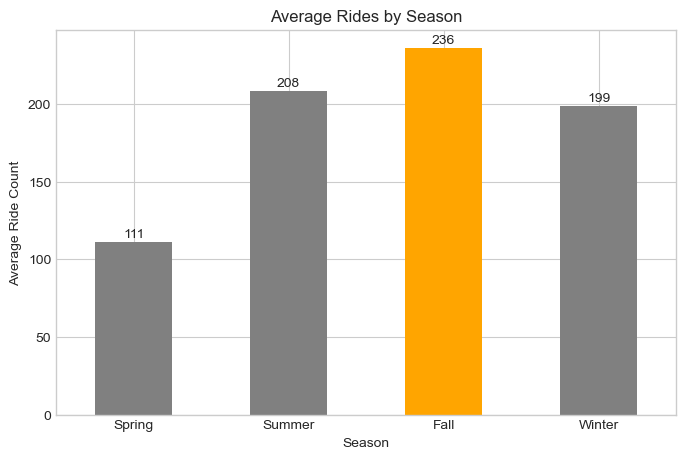

In [48]:
# map season numbers to names
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

avg_season = df.groupby('season')['cnt'].mean()

# colors: grey for all, highlight Fall (season 3)
colors = ["grey" if i != 3 else "orange" for i in avg_season.index]

plt.figure(figsize=(8,5))
bars = avg_season.plot(kind='bar', color=colors)

plt.title("Average Rides by Season")
plt.xlabel("Season")
plt.ylabel("Average Ride Count")
plt.xticks(ticks=range(4), labels=[season_labels[i] for i in avg_season.index], rotation=0)
plt.grid(True, axis='y')

# add labels on top of bars
for i, val in enumerate(avg_season):
    plt.text(i, val + 1, f"{val:.0f}", ha='center', va='bottom')

plt.show()


#### Fall is standing out the most
- It's good to explore how temperautre changes throughout the season, maybe becaus the temp is good during fall thats why it's the most popular
- dig into Winter too  

In [29]:
df[df['season'] == 4]['cnt'].describe()

count    4232.000000
mean      198.868856
std       182.967972
min         1.000000
25%        46.000000
50%       155.500000
75%       295.000000
max       967.000000
Name: cnt, dtype: float64

In [30]:
df[df['season'] == 4]['temp'].describe()


count    4232.000000
mean        0.423138
std         0.122167
min         0.140000
25%         0.320000
50%         0.420000
75%         0.520000
max         0.760000
Name: temp, dtype: float64

so Winter in this dataset isn’t brutal — it often averages in the 50s °F, sometimes even gets warm (up to 80s). that explains why Winter ridership holds up

## Extra visuals

I want to create a scatterplot, so looking back
- temp had a stronger correlation with ridership (≈0.40)
- windspeed had almost no correlation (≈0.09)

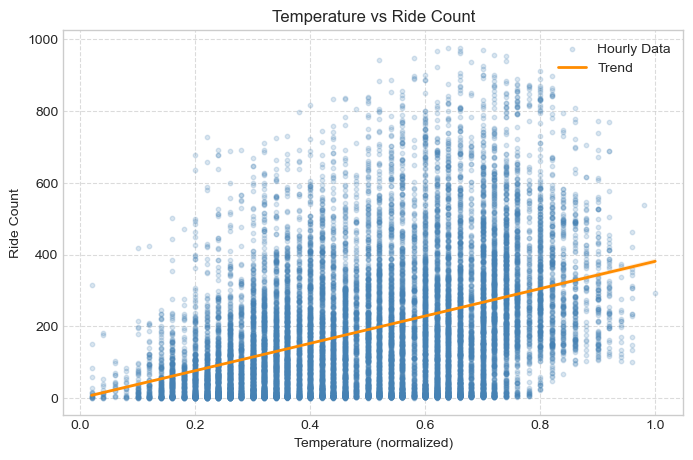

In [31]:
import seaborn as sns

plt.figure(figsize=(8,5))

# scatter with smaller, transparent points
plt.scatter(df['temp'], df['cnt'], s=10, alpha=0.2, color="steelblue", label="Hourly Data")

# add regression trend line
sns.regplot(x='temp', y='cnt', data=df, scatter=False, color="darkorange", line_kws={"linewidth":2}, label="Trend")

plt.title("Temperature vs Ride Count")
plt.xlabel("Temperature (normalized)")
plt.ylabel("Ride Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Across 2011–2012, bike demand rose with moderate temperatures but dropped in extreme cold/heat.

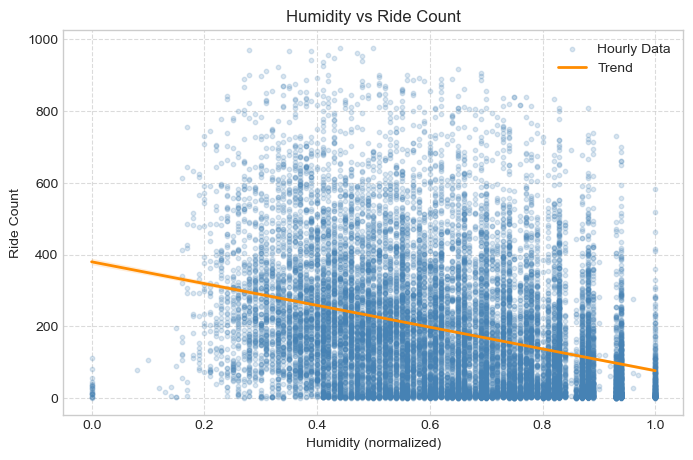

In [32]:
# humidity vs ride count
plt.figure(figsize=(8,5))

# scatter
plt.scatter(df['hum'], df['cnt'], s=10, alpha=0.2, color="steelblue", label="Hourly Data")

# regression line
sns.regplot(x='hum', y='cnt', data=df, scatter=False, color="darkorange", line_kws={"linewidth":2}, label="Trend")

plt.title("Humidity vs Ride Count")
plt.xlabel("Humidity (normalized)")
plt.ylabel("Ride Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Negative slope → as humidity increases, rides drop.

The cloud is more spread than temp, but the downward trend is clear.

Stakeholder story: Riders avoid biking in sticky, humid conditions.

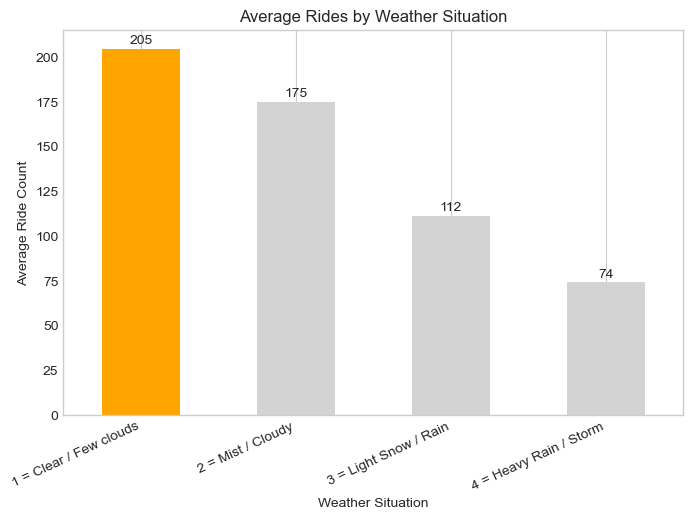

In [33]:
avg_weather = df.groupby('weathersit')['cnt'].mean()

# custom colors: highlight clear days
colors = ["orange" if i == 1 else "lightgrey" for i in avg_weather.index]

plt.figure(figsize=(8,5))
bars = avg_weather.plot(kind='bar', color=colors)

plt.title("Average Rides by Weather Situation")
plt.xlabel("Weather Situation")
plt.ylabel("Average Ride Count")
plt.xticks(
    ticks=range(4),
    labels=[
        "1 = Clear / Few clouds",
        "2 = Mist / Cloudy",
        "3 = Light Snow / Rain",
        "4 = Heavy Rain / Storm"
    ],
    rotation=25,
    ha="right"
)
plt.grid(axis='y')

# add labels on top of bars
for i, val in enumerate(avg_weather):
    plt.text(i, val + 1, f"{val:.0f}", ha='center', va='bottom')

plt.show()


🌡️ Temperature vs Rides (scatter)
- Insight: Demand rises as temps increase up to ~0.6–0.7 (about 20–25°C / 68–77°F). Beyond that, extreme heat reduces ridership.
- Why it matters:
    - PM: demand is fragile in extreme weather, don’t misinterpret dips as product failure.
    - Ops: staff for higher demand on mild days.
    - Mktg:  “perfect weather” promos could boost usage further.

💧 Humidity vs Rides (scatter)
- Insight: Higher humidity correlates with fewer rides. Ridership drops steadily as humidity approaches 1 (100%).
- Why it matters:
    - PM:  confirms riders avoid biking in uncomfortable weather.
    - Ops: expect slack demand on humid days (good time for maintenance).
    - Mktg: avoid scheduling promos during sticky weather (wasted budget).

🌤️ Weather Situation (bar)
- Insight: Clear/few-clouds days drive the highest ridership (~205 avg rides/hour). Ridership steadily drops in worse weather: mist/cloudy (175), light snow/rain (112), heavy rain/storm (74).
- Why it matters:
    - PM & Ops: demand depends strongly on weather categories, product and supply planning must be weather-aware.
    - Mktg:  how effective promos are in driving extra rides relative to what you spend
    - Policy/Ethics: ensure equitable access even in bad weather (don’t underserve).